In [80]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [81]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = [200]
network_size = [25]
total_nodes = 300
new_network = True

trial = 3000

mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'
static_features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
models =  static_features + time_features

{'random': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4741853316076803, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4683058478337285, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 1.8003749972932062, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013}}


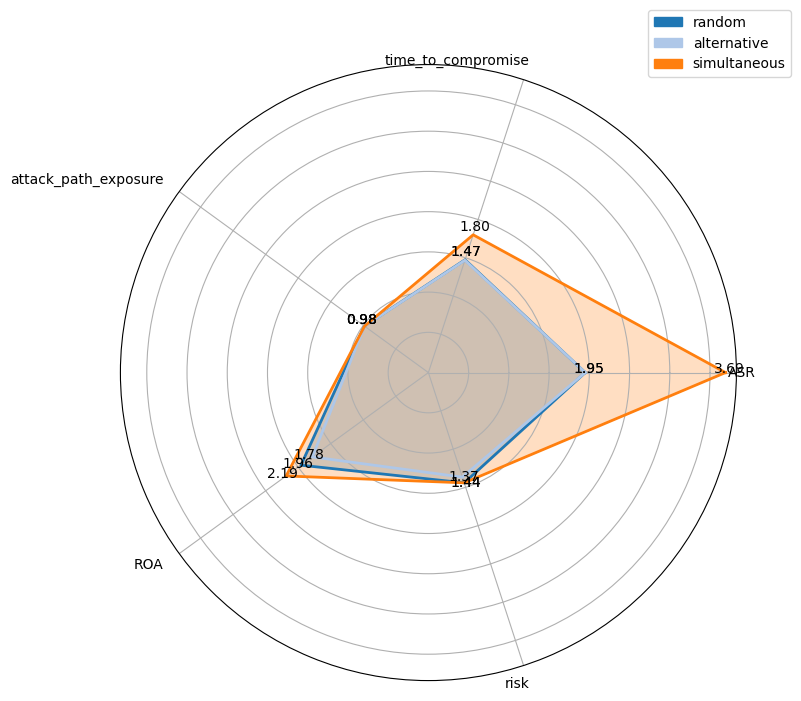

In [82]:
radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "all_features", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(['random', 'alternative', "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

host_compromise_ratio
{'host_compromise_ratio': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1273737107388877, 'attack_path_exposure': 3.535973735046843, 'ROA': 1.299103089262058, 'risk': 1.2557251647000462}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4741853316076803, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4683058478337285, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 1.8003749972932062, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013}}


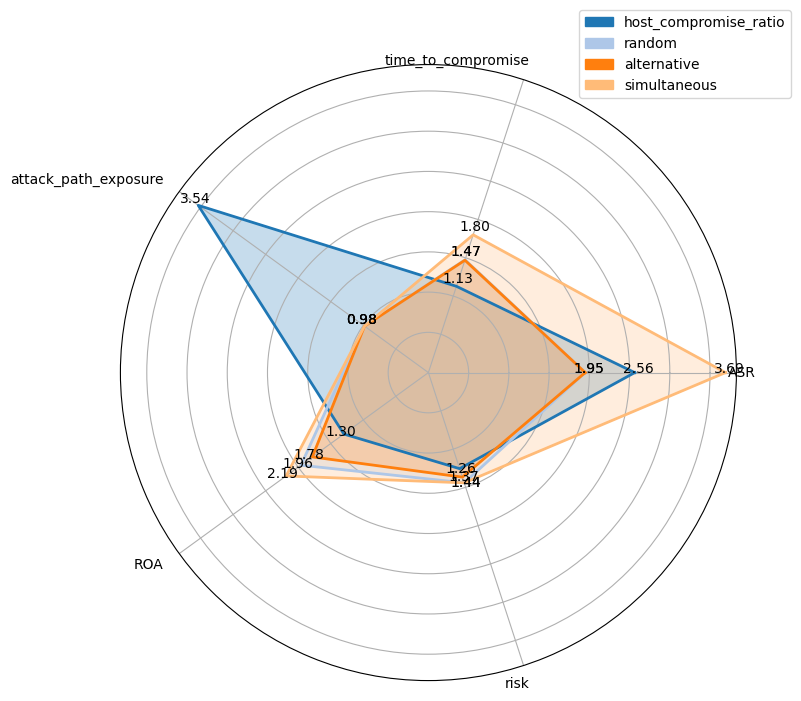

exposed_endpoints
{'exposed_endpoints': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1171632933104922, 'attack_path_exposure': 3.5160223651776596, 'ROA': 1.3009807749198383, 'risk': 1.2880358100732312}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4741853316076803, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4683058478337285, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 1.8003749972932062, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013}}


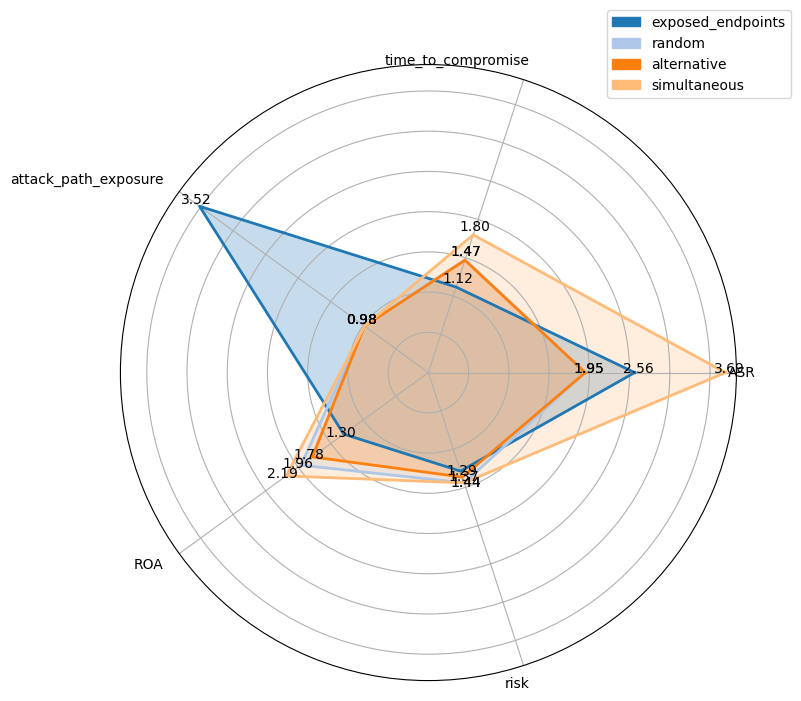

attack_path_exposure
{'attack_path_exposure': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1162444514417786, 'attack_path_exposure': 3.5277617756437136, 'ROA': 1.347445745086351, 'risk': 1.3902526297845048}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4741853316076803, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4683058478337285, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 1.8003749972932062, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013}}


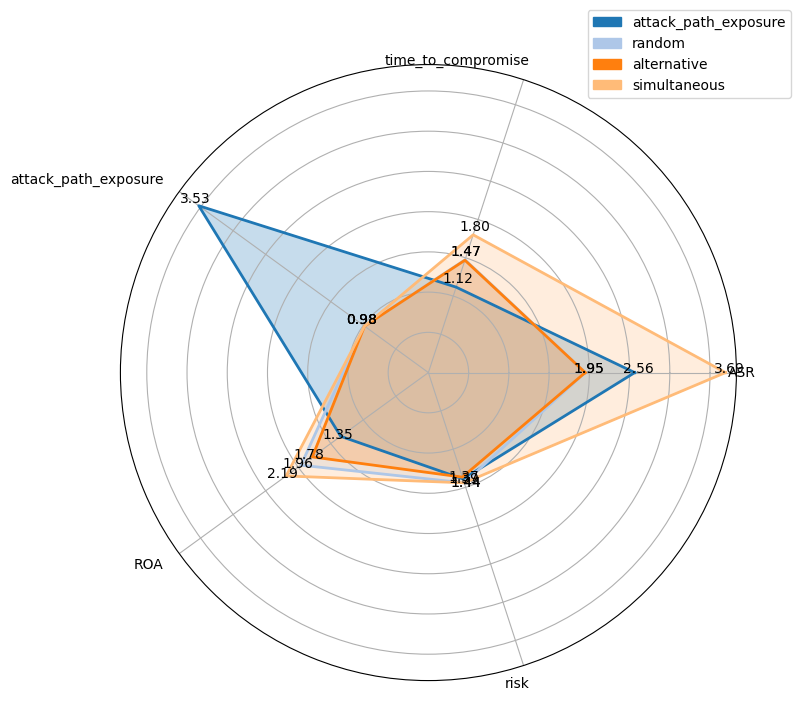

overall_asr_avg
{'overall_asr_avg': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1337131645099905, 'attack_path_exposure': 3.529283968498235, 'ROA': 1.2971201124983467, 'risk': 1.2206631676431954}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4741853316076803, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4683058478337285, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 1.8003749972932062, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013}}


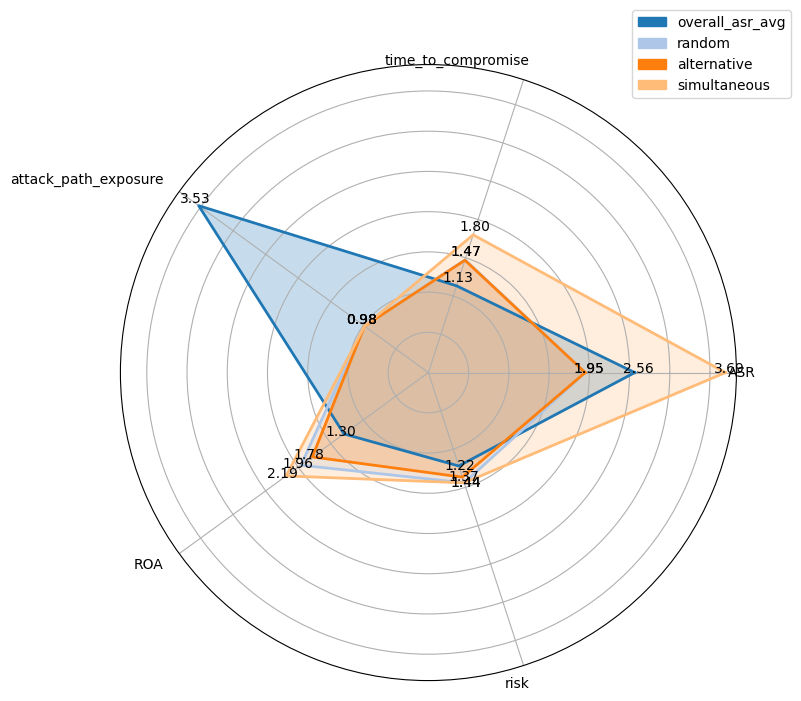

roa
{'roa': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1226702342071169, 'attack_path_exposure': 3.521961824636629, 'ROA': 1.3263772298839225, 'risk': 1.298709819208523}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4741853316076803, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4683058478337285, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 1.8003749972932062, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013}}


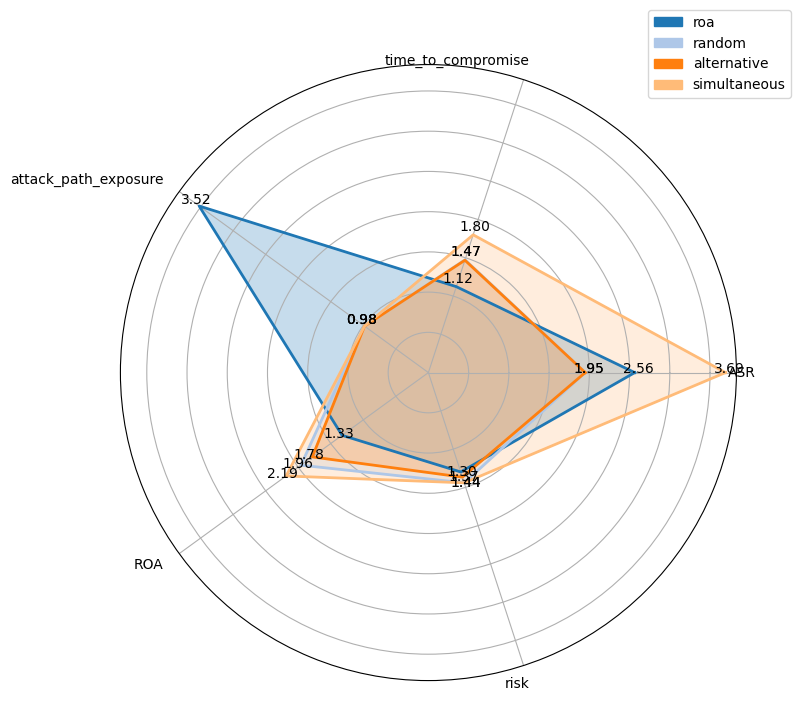

shortest_path_variability
{'shortest_path_variability': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1125679789974896, 'attack_path_exposure': 3.5178200848145806, 'ROA': 1.308820245673483, 'risk': 1.2516245917493674}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4741853316076803, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4683058478337285, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 1.8003749972932062, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013}}


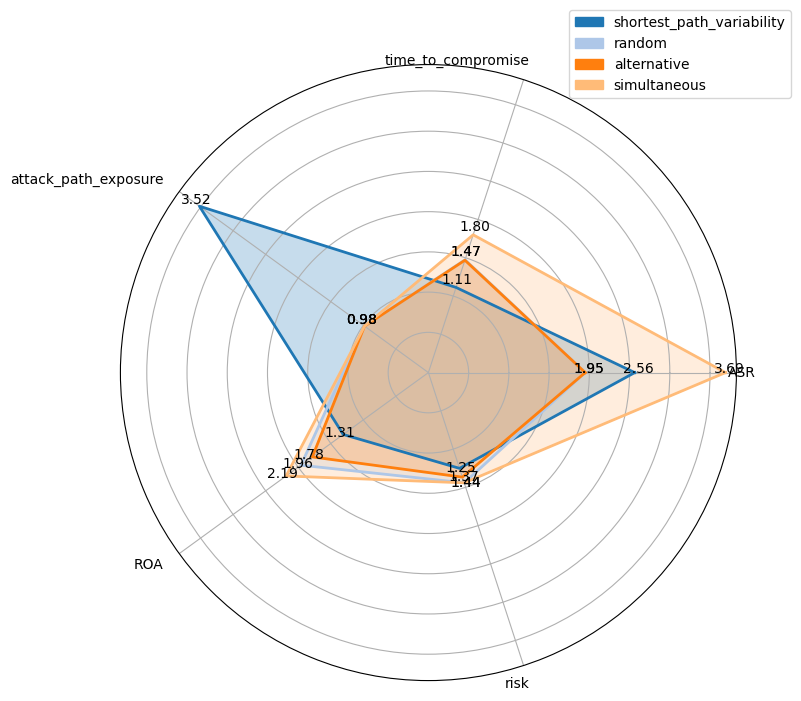

risk
{'risk': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.124390078156443, 'attack_path_exposure': 3.5314151142779493, 'ROA': 1.2745437837470743, 'risk': 1.2268374467526222}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4741853316076803, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4683058478337285, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 1.8003749972932062, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013}}


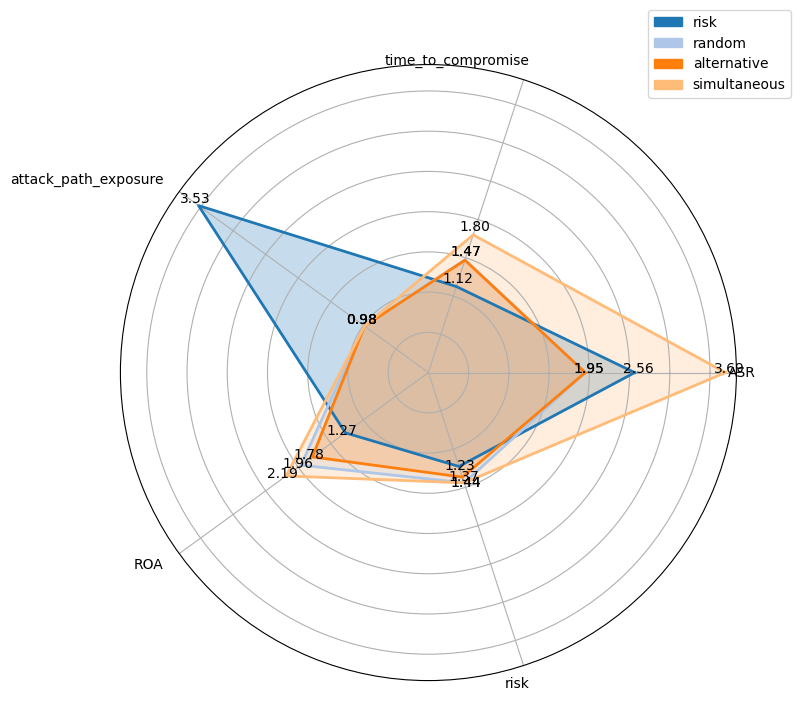

mtd_freq
{'mtd_freq': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.122232127360979, 'attack_path_exposure': 3.5341467394260238, 'ROA': 1.3251328920604635, 'risk': 1.311091476511603}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4741853316076803, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4683058478337285, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 1.8003749972932062, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013}}


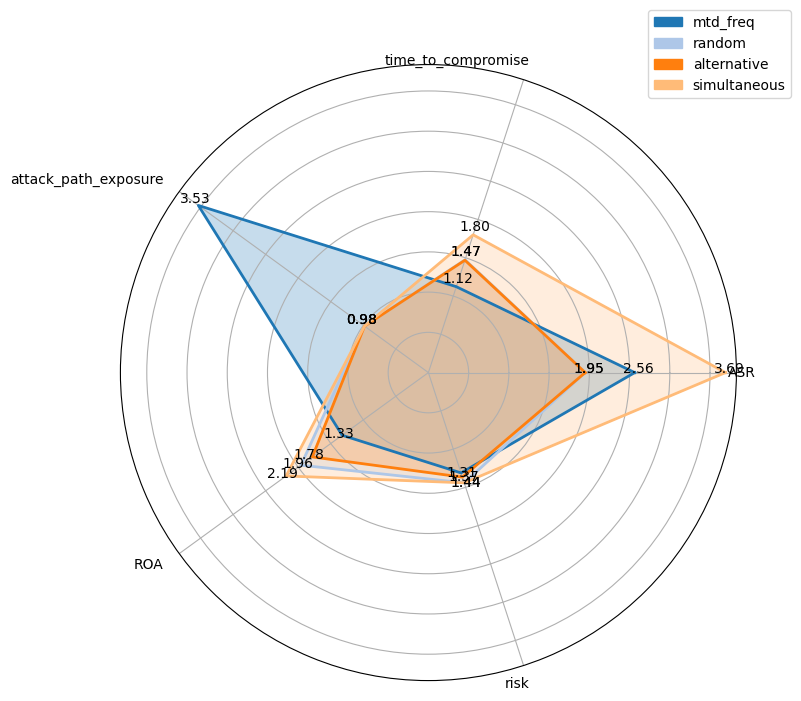

overall_mttc_avg
{'overall_mttc_avg': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.111094593086553, 'attack_path_exposure': 3.524200935255267, 'ROA': 1.2803437894882406, 'risk': 1.1928069107575294}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4741853316076803, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4683058478337285, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 1.8003749972932062, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013}}


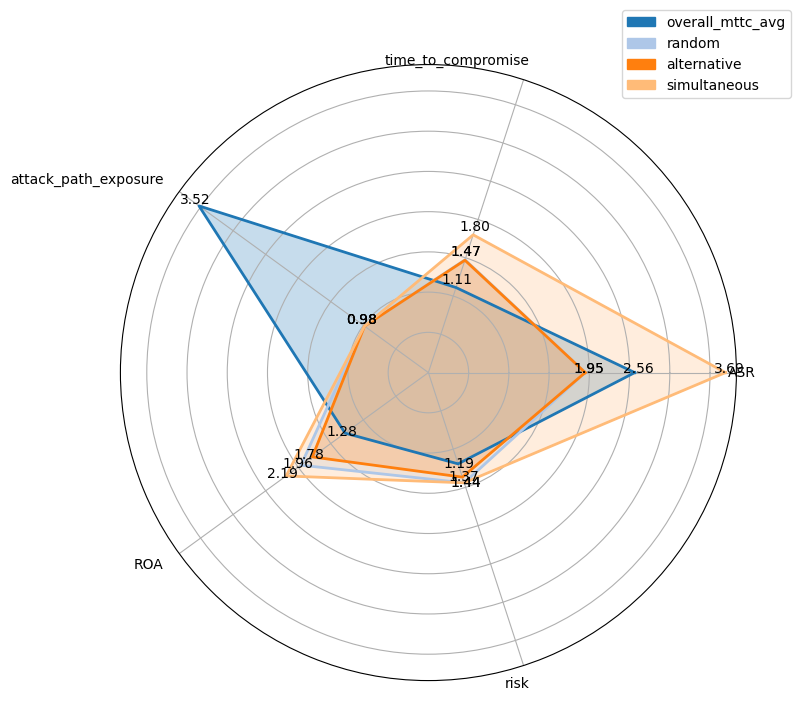

time_since_last_mtd
{'time_since_last_mtd': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1239073398698056, 'attack_path_exposure': 3.5403512382935696, 'ROA': 1.308017220872436, 'risk': 1.299070620058304}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4741853316076803, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 1.4683058478337285, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 1.8003749972932062, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013}}


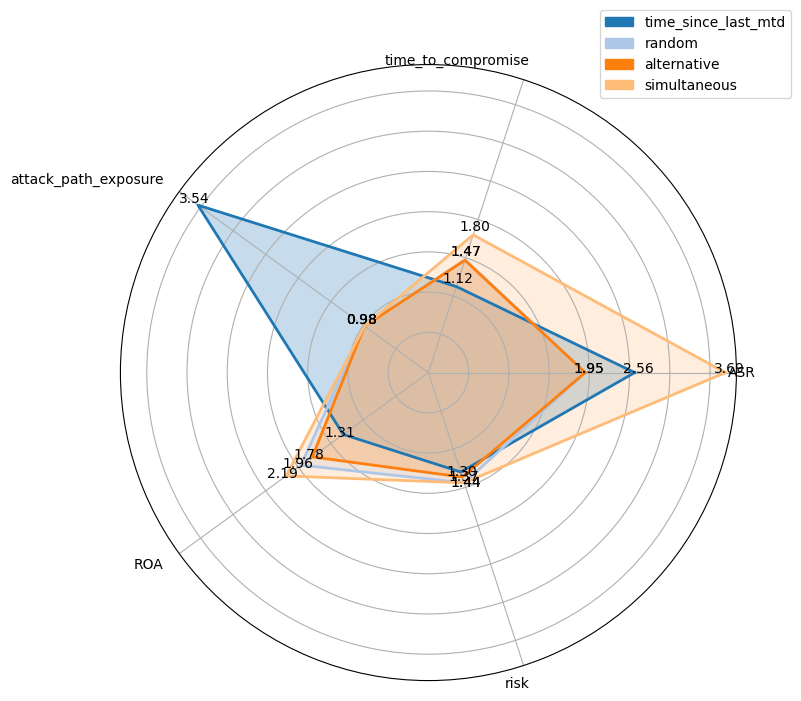

In [83]:
for model in models:

    print(model)
    radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  model, trial, result_head_path)
    schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline([model, 'random', 'alternative', "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
    # schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline([model, 'random', 'alternative', "simultaneous"],run_trial = False)).to_dict()
    print(schemes_data)
    radar.plot_n_schemes(schemes_data)
 

{'host_compromise_ratio': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1273737107388877, 'attack_path_exposure': 3.535973735046843, 'ROA': 1.299103089262058, 'risk': 1.2557251647000462}, 'exposed_endpoints': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1171632933104922, 'attack_path_exposure': 3.5160223651776596, 'ROA': 1.3009807749198383, 'risk': 1.2880358100732312}, 'attack_path_exposure': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1162444514417786, 'attack_path_exposure': 3.5277617756437136, 'ROA': 1.347445745086351, 'risk': 1.3902526297845048}, 'overall_asr_avg': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1337131645099905, 'attack_path_exposure': 3.529283968498235, 'ROA': 1.2971201124983467, 'risk': 1.2206631676431954}, 'roa': {'ASR': 2.5641025641025643, 'time_to_compromise': 1.1226702342071169, 'attack_path_exposure': 3.521961824636629, 'ROA': 1.3263772298839225, 'risk': 1.298709819208523}, 'shortest_path_variability': {'ASR': 2.5641025641025643, 't

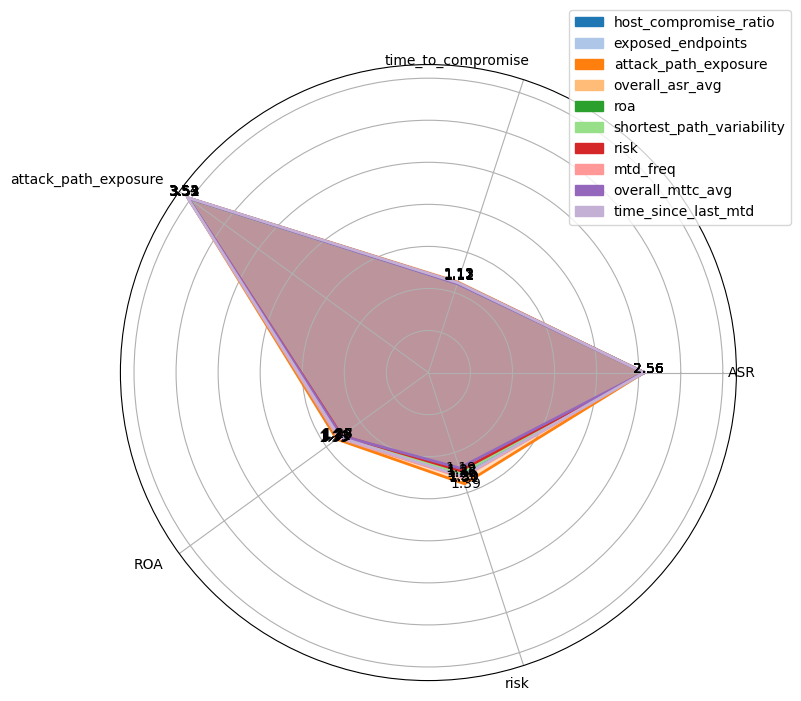

In [84]:

radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  model, trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(models,run_trial = False)).T.drop(columns=[ 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", "shortest_path_variability", "MEF"], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def plot_comparison(data, scaling_method=None):
    # Convert the dictionary into a DataFrame
    df = pd.DataFrame(data)

    # Transpose the DataFrame so metrics become columns and categories are rows
    df = df.transpose()

    # Normalize or scale the data if specified
    if scaling_method == 'minmax':
        scaler = MinMaxScaler()
        df[df.columns] = scaler.fit_transform(df)
    elif scaling_method == 'zscore':
        scaler = StandardScaler()
        df[df.columns] = scaler.fit_transform(df)

    # Plot each metric as a separate bar chart
    metrics = df.columns
    num_metrics = len(metrics)

    # Set up the plotting area with multiple subplots
    fig, axes = plt.subplots(nrows=num_metrics, figsize=(10, 4 * num_metrics))

    for i, metric in enumerate(metrics):
        sns.barplot(ax=axes[i], data=df, x=df.index, y=metric)
        axes[i].set_title(f'Comparison for {metric} (scaled)' if scaling_method else f'Comparison for {metric}')
        axes[i].set_ylabel(metric)
        axes[i].set_xlabel('Category')
        
        # Rotate x-axis labels by 90 degrees
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_comparison(schemes_data, scaling_method='minmax')


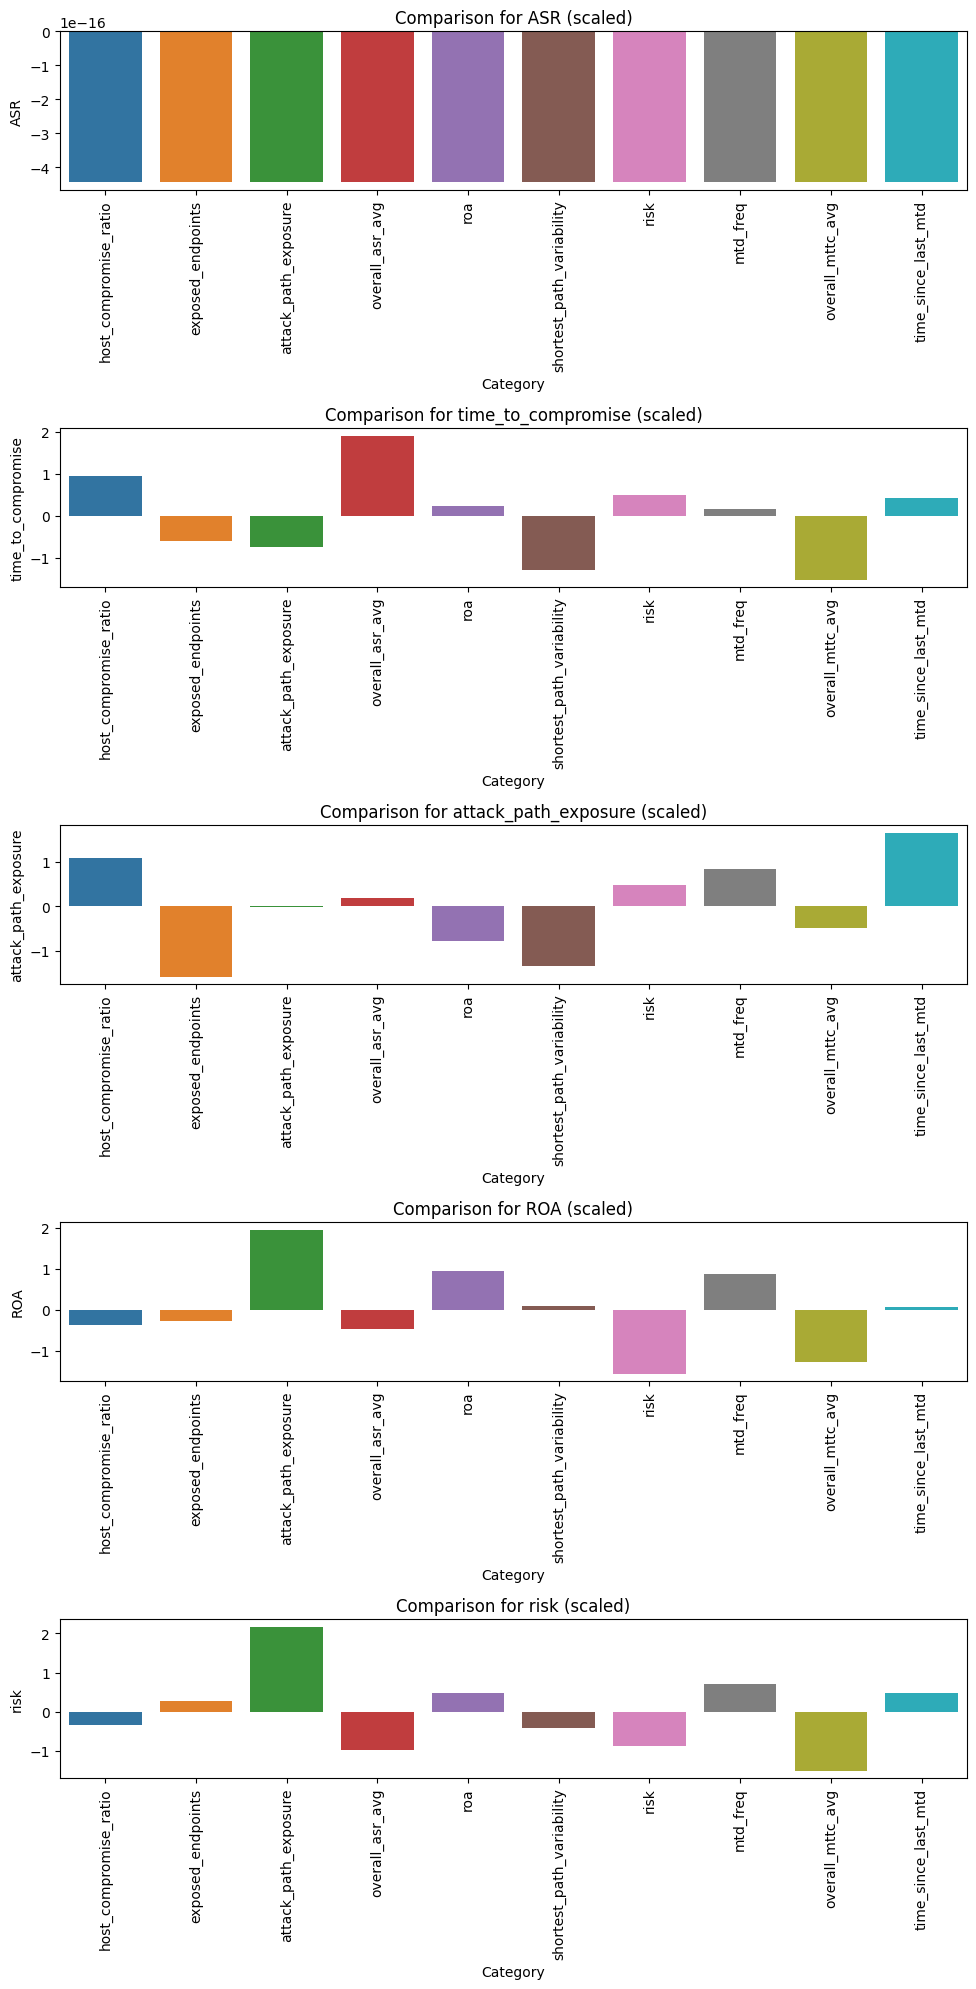

In [86]:
plot_comparison(schemes_data, 'zscore')